<a href="https://colab.research.google.com/github/kaurimaan/ML-Projects/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train CNN network for image classification on mini-imagenet datasets (mentioned
below). Please network paramters are used for experimenting -
1. Number of convolutional (conv) layers
2. Fully connected (fc) layers
3. Number of filters in different layers
4. Max Pooling
5. Training time (number of epochs)
6. Stride

In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# LOAD DATASET (Includes Channel Dimension 84x84x3)
IMG_SIZE = (84, 84)
BATCH_SIZE = 64
NUM_CLASSES = 33

In [3]:
# -o: overwrite files without asking
# -q: 'quiet' mode (so it doesn't print 50,000 file names)
# -d: destination folder
!unzip -o -q "/content/drive/MyDrive/Mini_imagenet.zip" -d /content/local_data

In [4]:
import os

# Let's look inside the folder where we unzipped everything
base_path = '/content/local_data'
print("Folders found:", os.listdir(base_path))

# We need to find where 'train' and 'val' are located.
# Sometimes unzipping creates an extra folder level.

Folders found: ['Mini_imagenet']


In [5]:
import os

# Updating paths based on your 'Folders found' output
train_path = '/content/local_data/Mini_imagenet/train'
val_path   = '/content/local_data/Mini_imagenet/val'
test_path  = '/content/local_data/Mini_imagenet/test'

# The Sanity Check
if os.path.exists(train_path):
    num_classes = len(os.listdir(train_path))
    print(f"✅ Success! Path is correct.")
    print(f"✅ Found {num_classes} classes (should be 100).")
else:
    print("❌ Path still not found. Double-check the spelling/capitalization.")

✅ Success! Path is correct.
✅ Found 33 classes (should be 100).


In [6]:
# 2. Data Loading
train_ds = tf.keras.utils.image_dataset_from_directory (
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

Found 13200 files belonging to 33 classes.
Found 3300 files belonging to 33 classes.


In [7]:
# 3. Pipeline Performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

PART A of the project where in we are defining CNN architecture and experimenting with network paramters

In [8]:
#Define CNN Model
# 1. Configuration
IMG_SIZE = (84, 84)
BATCH_SIZE = 64
NUM_CLASSES = 33  # Updated to match folder count

# 2. Data Loading
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
    )

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# 3. Pipeline Performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#4 CNN architecture
#Running for epoch 5 , 10 and 20 eventually ,  2 convolution layer , 1 fully connected layer , Filter as 32, 64, 128
model_a = models.Sequential([
    layers.Input(shape=(84, 84, 3)),
    layers.Rescaling(1./255), # NORMALIZATION

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. TRAIN
print("Starting Part A Training...")
history_5 = model_a.fit(train_ds, validation_data=val_ds, epochs=5)

# Iteration 1: 10 Epochs
print("Running Part A with 10 Epochs...")
history_10 = model_a.fit(train_ds, validation_data=val_ds, epochs=10)

# Iteration 2: 20 Epochs
print("Running Part A with 20 Epochs...")
history_20 = model_a.fit(train_ds, validation_data=val_ds, epochs=20)


Found 13200 files belonging to 33 classes.
Found 3300 files belonging to 33 classes.
Starting Part A Training...
Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.1305 - loss: 3.2102 - val_accuracy: 0.2888 - val_loss: 2.6357
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3488 - loss: 2.3742 - val_accuracy: 0.3670 - val_loss: 2.3481
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5182 - loss: 1.7333 - val_accuracy: 0.3612 - val_loss: 2.4086
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6440 - loss: 1.2306 - val_accuracy: 0.3815 - val_loss: 2.4785
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7890 - loss: 0.7508 - val_accuracy: 0.3830 - val_loss: 2.8047
Running Part A with 10 Epochs...
Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8937 - loss: 0.4178 - val_accuracy: 0.3694 - val_loss: 3.4068
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9513 - loss: 0.20

Results show that the model overfit with 10 epochs and severly overfit with 20 epochs. There is huge difference between training data accuracy and validation data accuracy.

Introducing three convolution layers 32, 64, 128 and running with 10 epochs to see CNN model behavior

In [9]:
#Define CNN Model
# 1. Configuration
IMG_SIZE = (84, 84)
BATCH_SIZE = 64
NUM_CLASSES = 33  # Updated to match folder count

# 2. Data Loading
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
    )

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# 3. Pipeline Performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#4 CNN architecture
#Running for 10 epochs ,  3 convolution layer , 1 fully connected layer , Filter as 32, 64, 128
model_a = models.Sequential([
    layers.Input(shape=(84, 84, 3)),
    layers.Rescaling(1./255), # NORMALIZATION

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. TRAIN

# Iteration : 10 Epochs
print("Running Part A with 10 Epochs...")
history_10 = model_a.fit(train_ds, validation_data=val_ds, epochs=10)

Found 13200 files belonging to 33 classes.
Found 3300 files belonging to 33 classes.
Running Part A with 10 Epochs...
Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.1148 - loss: 3.2272 - val_accuracy: 0.2639 - val_loss: 2.6421
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3090 - loss: 2.4676 - val_accuracy: 0.3430 - val_loss: 2.3963
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4041 - loss: 2.1151 - val_accuracy: 0.3830 - val_loss: 2.2674
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5082 - loss: 1.7178 - val_accuracy: 0.4070 - val_loss: 2.1585
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5838 - loss: 1.4414 - val_accuracy: 0.4179 - val_loss: 2.2309
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6787 - loss: 1.0755 - val_accuracy: 0.4267 - val_loss: 2.3227
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7784 - loss: 0.7707 - val_accuracy: 0.42

In PART A , Model A  , we saw that models are extremely overfitting. HEnce , now in Model B , we will introduce Overfitting methods - Drop out and Data Augmentation . Drop out parameters were hypertuned to 0.2 and 0.5 to observe Model accuracy.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# --- 1. SETUP & DATA LOADING ---
IMG_SIZE = (84, 84)
BATCH_SIZE = 64
NUM_CLASSES = 33

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Optimize for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- 2. ARCHITECTURE B (Augmentation + Dropout + 3 Conv Layers) ---
model_b = models.Sequential([
    layers.Input(shape=(84, 84, 3)),

    # DATA AUGMENTATION (Active only during training)
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # PREPROCESSING
    layers.Rescaling(1./255),

    # CONVOLUTIONAL BLOCKS
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # CLASSIFICATION HEAD
    layers.Flatten(),
    layers.Dropout(0.5), # DROPOUT: Randomly cuts 50% of paths to prevent memorization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Second dropout for extra robustness
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_b.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 3. TRAINING ---
print("Starting Part B: Training with Regularization...")
# Recommend running for 20-25 epochs to see the full effect
history_b = model_b.fit(train_ds, validation_data=val_ds, epochs=25)

Found 13200 files belonging to 33 classes.
Found 3300 files belonging to 33 classes.
Starting Part B: Training with Regularization...
Epoch 1/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.0677 - loss: 3.3946 - val_accuracy: 0.1845 - val_loss: 2.9302
Epoch 2/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1879 - loss: 2.9280 - val_accuracy: 0.2567 - val_loss: 2.7272
Epoch 3/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2493 - loss: 2.6857 - val_accuracy: 0.2691 - val_loss: 2.6783
Epoch 4/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2840 - loss: 2.5434 - val_accuracy: 0.3139 - val_loss: 2.5667
Epoch 5/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3199 - loss: 2.4165 - val_accuracy: 0.3791 - val_loss: 2.2482
Epoch 6/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3337 - loss: 2.3483 - val_accuracy: 0.3227 - val_loss: 2.6325
Epoch 7/25
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3556 - loss: 2.2919 - va

PART B - We saw that Model B perfomed the best when we applied Overfitting methods. Now this best performing model is used to evaluate Occlusion Sensitivity

Found 3300 files belonging to 33 classes.


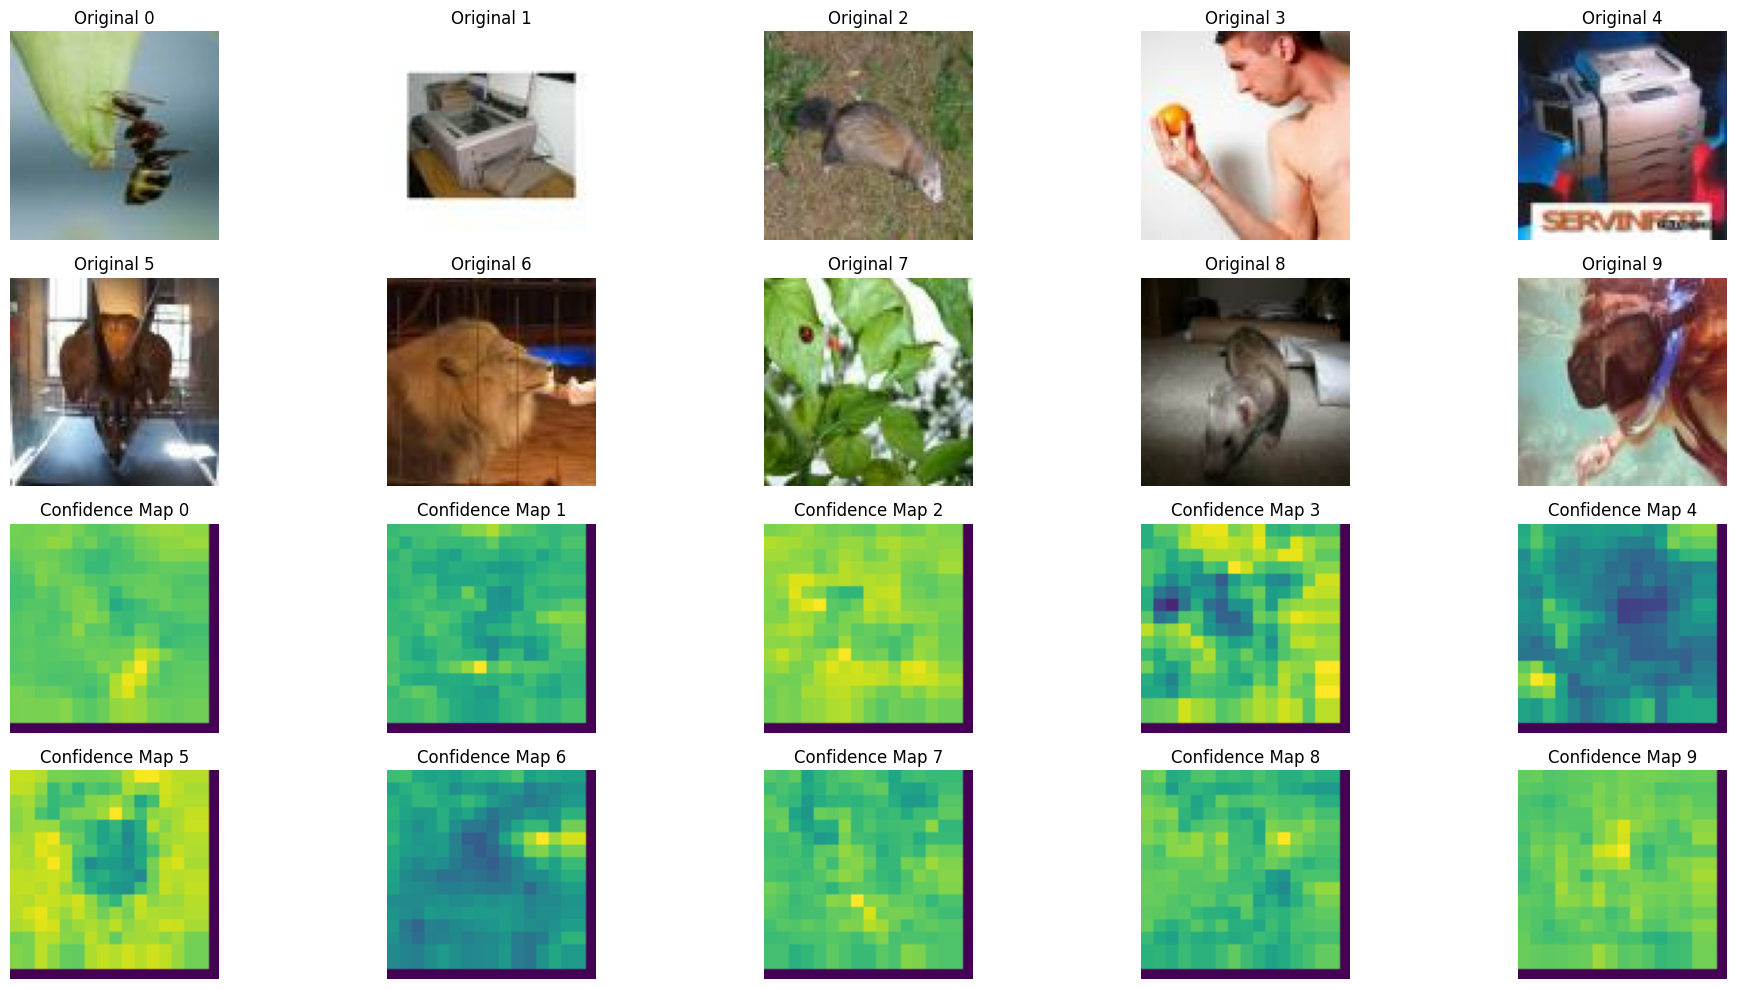

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def perform_occlusion_experiment(model, img, true_label, N=15, stride=4):
    """
    Sliding window occlusion to create a confidence map.
    N: size of the gray square (N x N)
    stride: how many pixels to jump (lower is more detailed but slower)
    """
    height, width, channels = img.shape
    # Initialize the confidence map with zeros
    confidence_map = np.zeros((height, width))

    # Pre-process the image for the model

    img_input = np.expand_dims(img, axis=0)

    # 1. Slide the window across the image
    for i in range(0, height - N, stride):
        for j in range(0, width - N, stride):
            # Create a copy of the image to occlude
            img_occluded = img.copy()

            # Replace window with gray pixels (approx 128 for 0-255 scale)
            img_occluded[i:i+N, j:j+N, :] = 128

            # 2. Get model prediction for the occluded image
            preds = model.predict(np.expand_dims(img_occluded, axis=0), verbose=0)

            # 3. Store the probability of the TRUE class
            true_class_prob = preds[0][true_label]

            # Fill the N x N area in our map with this confidence value
            confidence_map[i:i+N, j:j+N] = true_class_prob

    return confidence_map

# --- EXECUTION ON 10 IMAGES ---
# Assuming 'test_ds' is your test dataset
# Define test_ds first
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_images, test_labels = next(iter(test_ds.take(1)))

plt.figure(figsize=(20, 10))

for idx in range(10):
    img = test_images[idx].numpy()
    label = test_labels[idx].numpy()

    # Generate the map
    conf_map = perform_occlusion_experiment(model_b, img, label, N=10, stride=5)

    # Plotting
    plt.subplot(4, 5, idx + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(f"Original {idx}")
    plt.axis('off')

    plt.subplot(4, 5, idx + 11)
    # Using 'jet' or 'viridis' - dark blue means LOW confidence (important part occluded)
    plt.imshow(conf_map, cmap='viridis')
    plt.title(f"Confidence Map {idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
from PIL import Image

# Path to one of your images
img_path = '/content/local_data/Mini_imagenet/train/goose/n0185567200000003.jpg'

with Image.open(img_path) as img:
    width, height = img.size
    print(f"Image Dimensions: {width}x{height}")
    print(f"Color Mode: {img.mode}") # RGB means 3 channels

Image Dimensions: 84x84
Color Mode: RGB


In [13]:
# Verify performance on the completely unseen Test folder
results = model_b.evaluate(test_ds)
print(f"Final Test Accuracy: {results[1]*100:.2f}%")

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4631 - loss: 1.9362
Final Test Accuracy: 45.45%


Generating predictions for Confusion Matrix...


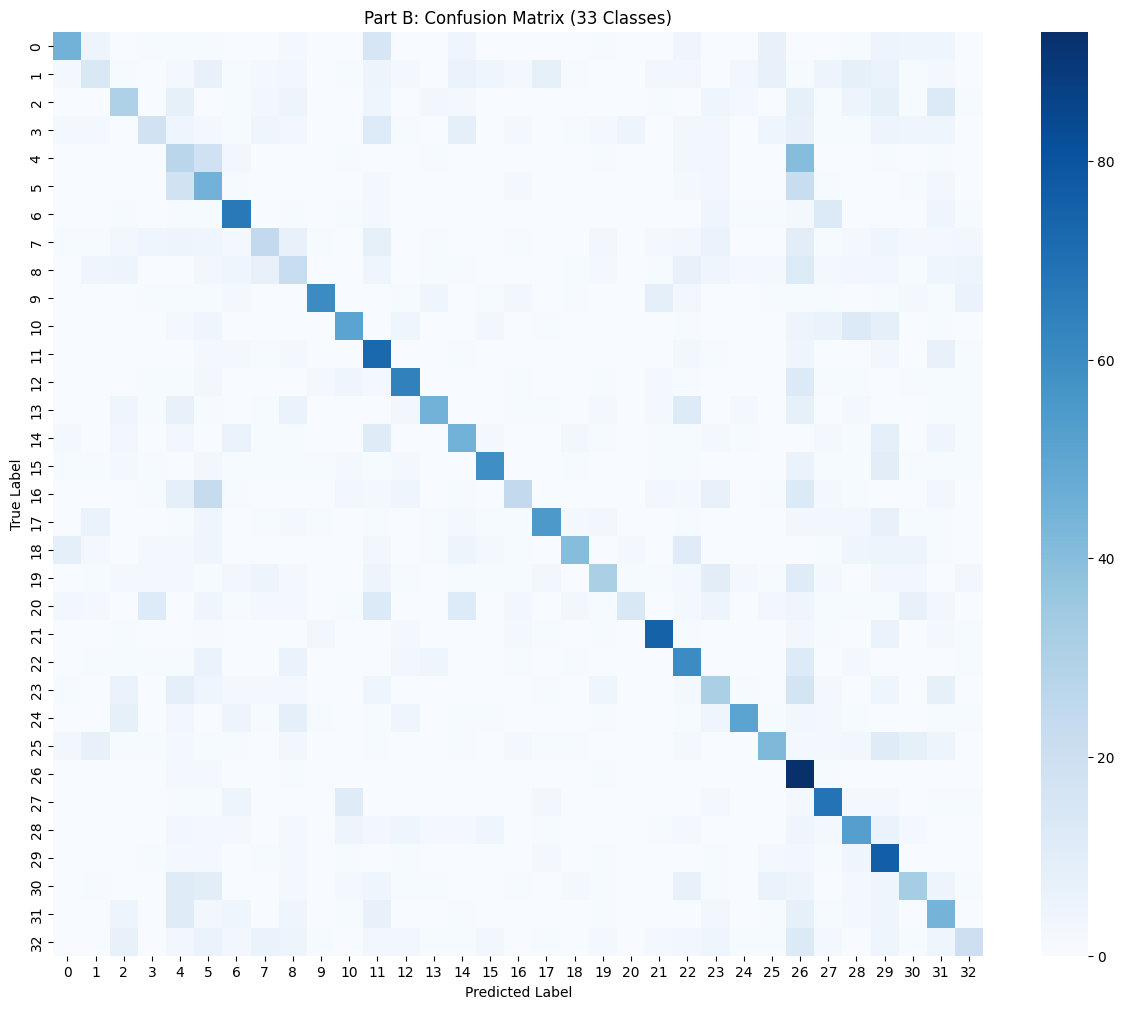

In [14]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1. Collect all true labels and model predictions
all_labels = []
all_preds = []

print("Generating predictions for Confusion Matrix...")
for images, labels in test_ds:
    preds = model_b.predict(images, verbose=0)
    all_preds.extend(np.argmax(preds, axis=1))
    all_labels.extend(labels.numpy())

# 2. Create the Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# 3. Plotting
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Part B: Confusion Matrix (33 Classes)')
plt.show()